<a href="https://colab.research.google.com/github/adminaluru/first-repo/blob/main/F542K432_RNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
This file is based on the TensorFlow tutorials
"""

"""
This script explores how the encoder works.  """

"""
# Import TensorFlow libraries
"""
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

"""
# Download the dataset
"""
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)

"""
# Show information about the training dataset. It should show two tensors. One with the reviews and one
with the labels
"""
#print(train_dataset.element_spec)

"""
# Lets print a few examples of the dataset.  
"""
train_examples=dataset['train']

for example_review, example_label in train_examples.take(5):
    print()
    print('text: ', example_review.numpy())
    print('label: ', example_label.numpy())


"""
The vocabulary. When dealing with text, we first need to identify all the words that exist in the
training dataset. The list of unique words is called the vocabulary. We will use this list to replace
words in the training dataset with their index in the vocabulary. TensorFlow provides the vocabulary
building function through its TextVectorization layer. 

In the following, we extract the training samples, and create a TextVectorization
layer called encoder.  
"""

VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)#Initilize layer
encoder.adapt(train_examples.map(lambda text, label: text))#create vocabulary for training dataset

"""
Vocabulary Visualization. Lets take a look at how the vocabulary looks like. You will notice that the
punctuation is gone and that all words are lower case. We do this to simplify the vocabulary. We also 
limited the vocabulary to VOCAB_SIZE so some words will be assigned to UNK (i.e., unknown).
"""
vocab = np.array(encoder.get_vocabulary())
print("These are the first 20 words in the vocabulary:")
print(vocab[:20])


"""
Encoding Visualization. Lets see how some of our reviews will get encoded to vocabulary indexes
"""
encoded_example = encoder(example_review).numpy()
print("Example Review:")
print(example_review)
print("Encoded Example Review")
print(encoded_example)

"""
Embedding. After replaceing words with their vocabulary index, we replace them with a vector that
describes their meaning. Words with similar meanings have vectors with similar values. The idea is that
we are not really interested in the specifc words but rather in their meaning inside the sentences. 
So, before we give the input to the RNN we identify words that are similar. 

To do this we use the Embedding layer which can be trained to find these meaning vectors.

The layer code is below. However, we cannot visualize the vectors until we train the RNN. So for now, we
won't have an output for this part. 
"""

embedding = tf.keras.layers.Embedding(
                                    input_dim=len(encoder.get_vocabulary()),
                                    output_dim=64,
                                    # Use masking to handle the variable sequence lengths
                                    mask_zero=True)





Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteEDUA64/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteEDUA64/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteEDUA64/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.

text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0

text:  b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tir

In [ ]:
"""
This file is based on the TensorFlow tutorials
"""

"""
This script builds an RNN for text classification """

"""
# Import TensorFlow libraries
"""
import numpy as np
import pandas as pd
from time import perf_counter

import tensorflow as tf
import tensorflow_datasets as tfds

"""
# Download the dataset
"""
dataset, info = tfds.load('imdb_reviews', with_info=True,as_supervised=True)
 
"""
# Divide the dataset into training and testing sets
"""
train_dataset, test_dataset = dataset['train'], dataset['test']

"""
Shuffle the data to ensure that we don't train the model with reviews that may realted in someway. 
Recall that we are assuming that each sample is iid. 

We also set the batch size here. This will be used during training
"""
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

"""
Build the encoder
"""
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))


"""
Build the RNN. Our RNN model will have an encoding layer that replaces the words in our text
with a number, an embedding layer that replaces the number with a vector, a bi-directional
LSTM, a dense layer, and an classification layer.  

"""
model = tf.keras.models.Sequential()
model.add(encoder)
model.add(tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1))

"""
We can verify the model by observing a diagram
Pydot can be installed by running "pip install pydot"
"""
tf.keras.utils.plot_model(model, to_file="rnn_model.png", show_shapes=True)

"""
We can also verify that we are building the model we want by displaying a summary of the layers 
"""
model.summary()

"""
We save the model to train it later
"""
model.save('untrained-rnn-model')



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, None, 64)          64000     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 138,369
Trainable params: 138,369
Non-trai

In [ ]:
"""
This file is based on the TensorFlow tutorials
"""

"""
This script trains an RNN for text classification """

"""
# Import TensorFlow libraries
"""
import numpy as np
import pandas as pd
from time import perf_counter

import tensorflow as tf
import tensorflow_datasets as tfds

"""
# Download the dataset
"""
dataset, info = tfds.load('imdb_reviews', with_info=True,as_supervised=True)
 
"""
# Divide the dataset into training and testing sets
"""
train_dataset, test_dataset = dataset['train'], dataset['test']

"""
Shuffle the data to ensure that we don't train the model with reviews that may realted in someway. 
Recall that we are assuming that each sample is iid. 

We also set the batch size here. This will be used during training
"""
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

"""
Build the encoder
"""
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))


"""
Build the RNN. Our RNN model will have an encoding layer that replaces the words in our text
with a number, an embedding layer that replaces the number with a vector, a bi-directional
LSTM, a dense layer, and an classification layer.  

"""
model = tf.keras.models.Sequential()
model.add(encoder)
model.add(tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1))

"""
Training settings. We use default values for binary classification problems
"""
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

"""
Train the model. The validation_steps parameter sets the number of batches in the validatin phase
"""
tic = perf_counter()#start training timer
history = model.fit(train_dataset, 
                    epochs=5,
                    validation_data=test_dataset,
                    validation_steps=30)
toc = perf_counter()# stop training timer
training_time = toc-tic #calculate total training time

"""
Finally, we save the training log, trining time, and the trained model for later analysis
"""
model.save('trained-rnn-model')

history_df = pd.DataFrame(history.history)
history_df.to_csv('rnn-training-history.csv')
np.savetxt('training_time.csv', [training_time], delimiter=',') 

Epoch 1/5
391/391 [==============================] - 749s 2s/step - loss: 0.6313 - accuracy: 0.5769 - val_loss: 0.4492 - val_accuracy: 0.7901
Epoch 2/5
391/391 [==============================] - 728s 2s/step - loss: 0.3803 - accuracy: 0.8274 - val_loss: 0.3700 - val_accuracy: 0.8401
Epoch 3/5
391/391 [==============================] - 731s 2s/step - loss: 0.3334 - accuracy: 0.8518 - val_loss: 0.3386 - val_accuracy: 0.8391
Epoch 4/5
391/391 [==============================] - 730s 2s/step - loss: 0.3185 - accuracy: 0.8620 - val_loss: 0.3392 - val_accuracy: 0.8568
Epoch 5/5
391/391 [==============================] - 733s 2s/step - loss: 0.3129 - accuracy: 0.8660 - val_loss: 0.3272 - val_accuracy: 0.8583


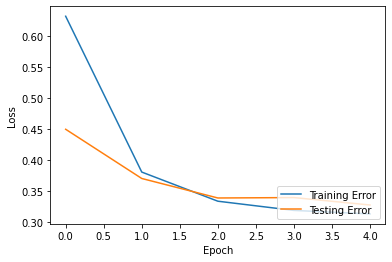

In [ ]:
"""
This file is based on the TensorFlow tutorials
"""

"""
### Import TensorFlow
"""
import matplotlib.pyplot as plt
import pandas as pd #we will use this to save the training log

"""
We first load the training log
"""
history = pd.read_csv('rnn-training-history.csv')


"""
### We can see the training accuracy and testing accuracy as follows. 
"""
plt.plot(history['accuracy'], label='accuracy')
plt.plot(history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.savefig('accuracy-plot.png')
plt.clf()


"""
### We can see the training and testing error as follows. 
"""
plt.plot(history['loss'], label='Training Error')
plt.plot(history['val_loss'], label = 'Testing Error')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.savefig('loss-plot.png')